# Plots for differentiation and thermal evolution<a class="anchor" id="top"></a>
For the whole thermal evolution:
+ [temperature](#temp)
+ [% silicate melted](#silicate)
+ [Rayleigh number](#critical-rayleigh)
+ [Stagnant lid thickness](#d0)
+ [Urey ratio](#Urey)


For differentiation stage:
+ [% iron melted](#iron)

For the thermal evolution stage:
+ [temperatures and heat fluxes](#temp-heat)
+ [inner core size and magnetic Reynolds number](#Rem)

## Set-up

In [1]:
#import modules
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from load_info import load_run_info

#scale time to Myr
from parameters import Myr, Tms, Tml, Xs_0 #need to change so import from save file instead

Choose run and whether you want to save figure

In [2]:
run=16
save = False # do you want to save your figures?
conduction = True #does the mantle switch to conduction

Load npz files for differentiation

In [3]:
npzfile = np.load(f'Results_combined/run_{run}_diff.npz')
Tdiff = npzfile['Tdiff'] 
iron = npzfile['Xfe']
silicate_d = npzfile['Xsi']
tdiff = npzfile['t_diff']
Ra_d = npzfile['Ra']
Ra_crit_d = npzfile['Ra_crit']
d0_diff = npzfile['d0']

Load npz files for thermal evolution

In [4]:
npzfile = np.load('Results_combined/run_{}.npz'.format(run))
Tc= npzfile['Tc'] 
Tc_conv = npzfile['Tc_conv']
Tcmb = npzfile['Tcmb']
Tm_mid = npzfile['Tm_mid']
Tm_conv = npzfile['Tm_conv']
Tm_surf = npzfile['Tm_surf'] 
T_profile = npzfile['T_profile']
f = npzfile['f'] 

t = npzfile['t'] #time in s
Rem_t = npzfile['Rem_t'] # magnetic Reynolds number from thermal convection 
Rem_mac = Rem_t[0,:] #Rem from MAC balance
Rem_cia = Rem_t[1,:] #Rem from CIA balance
Rem_c = npzfile['Rem_c'] # magnetic Reynolds number from compositional convection
Flux = npzfile['Flux']
Ra = npzfile['Ra'] 
RaH = npzfile['RaH'] 
RanoH = npzfile['RanoH'] 
RaRob = npzfile['RaRob']
Racrit = npzfile['Racrit'] 
d0 = npzfile['d0'] 
min_unstable = npzfile['min_unstable'] 
Urey = npzfile['Ur']
Xs = npzfile['Xs']
dl = npzfile['dl']
dx = npzfile['dc']
Fs = Flux[0]
Fcmb = Flux[1]
Fad = Flux[2]
Frad = Flux[3]

Run Info

In [5]:
r, dr, tstart, tend, tstep, tsolid, cond_t, dt, viscosity = load_run_info(run,'run_info.csv',conduction)

Calculate silicate melt content for thermal evolution

In [6]:
nmantle = int((r/dr)/2)
silicate_t = (T_profile[:,nmantle:] - Tms)/(Tml-Tms)

Concatenate shared variables

In [7]:
Tall = np.hstack((Tdiff,np.transpose(T_profile)))
tall = np.append(tdiff,t)
iron_all = np.hstack
Ra_all = np.append(Ra_d,Ra)
Ra_crit_all = np.append(Ra_crit_d,Racrit)
d0_all = np.append(d0_diff,d0)

Scale time, choose whether or not to plot logarithmically

In [8]:
t_plot_all = tall/Myr
t_plot_t = t/Myr
log_time = True # do you want to plot time logarithmically

Comparison with Kathryn Case 1

In [9]:
diff_time = tdiff[-1]/Myr
diff_T = Tdiff[int(nmantle),-1]
peakT = np.amax(Tall[nmantle:,:])
loc_max = np.where(Tall[nmantle:,:]==peakT)[1][0] #take the set of time coordinates and first value (they should all be the same)
tmax = tall[loc_max]/Myr
if np.all(T_profile[:,int(nmantle)-2]<Tcmb):
    tstrat_end = np.inf
else:
    tstrat_end = t[Tcmb < T_profile[:,int(nmantle)-2]][0]/Myr
    
if np.any(min_unstable==0):
     terode = t[np.where(min_unstable==0)[0]][0]/Myr
else:
    terode = np.inf
if np.all(Fcmb < Fad):
    tc_conv1 = np.inf
    tc_conv2 = np.inf
else:
    tc_conv1 = t[np.where(Fcmb>Fad)[0]][0]/Myr
    tc_conv2 = t[np.where(Fcmb>Fad)[0]][-1]/Myr
    print(tc_conv1,tc_conv2)

2.816761218363782 75.65712714941809


In [10]:
print(f'Differentiation is at {diff_time:.2f} Myr')
print(f'The temperature at differentiation is at {diff_T:.2f}K')
print(f'Peak magma ocean temp is {peakT:.0f}K at {tmax:.2f} Myr')
print(f'Mantle hotter than the core until {tstrat_end:.2f} Myr')
print(f'Erosion of stratification by {terode:.2f} Myr') 
print(f'Super adiabatic CMB heat flux starts at {tc_conv1:.2f} Myr')
print(f'Super adiabatic CMB heat flux ends at {tc_conv2:.2f} Myr')
print(f'End of mantle convection by {cond_t:.2f} Myr')

Differentiation is at 1.12 Myr
The temperature at differentiation is at 1468.01K
Peak magma ocean temp is 1626K at 1.22 Myr
Mantle hotter than the core until 2.82 Myr
Erosion of stratification by 8.31 Myr
Super adiabatic CMB heat flux starts at 2.82 Myr
Super adiabatic CMB heat flux ends at 75.66 Myr
End of mantle convection by 10.87 Myr


## Temperature <a class="anchor" id="temp"></a>
<p align="right">(<a href="#top">back to top</a>)</p>

In [11]:
import matplotlib.colors as mcolors

In [12]:
rplot = np.arange(0,int(r),int(dr))/1e3

In [13]:
r_unstable=np.array([]) 
for ind in min_unstable:
    r_unstable = np.append(r_unstable,rplot[int(ind)])
rc = r/2

In [14]:
cond_t

10.873652554780016

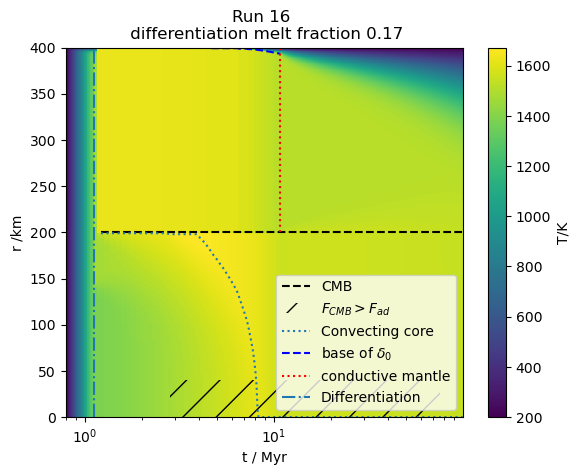

In [15]:
plt.figure()
plt.pcolormesh(t_plot_all,rplot,Tall,shading = 'nearest') # use same vmin and vmax as other plots to make them comparable
plt.hlines(rc/1e3,min(t/Myr),max(tall/Myr),linestyle='--',color='black',label='CMB')
plt.fill_betweenx([0,rc/5e3],t[np.where(Fcmb>Fad)[0]][0]/Myr,t[np.where(Fcmb>Fad)[0]][-1]/Myr,alpha=0,hatch='/',label='$F_{CMB}>F_{ad}$')
plt.plot(t/Myr,r_unstable,linestyle='dotted',label='Convecting core')
if conduction == True:
    plt.plot(t[t/Myr<=cond_t]/Myr,(r-d0[t/Myr<=cond_t])/1e3,linestyle='dashed',label='base of $\delta_0$',color='blue')
    plt.vlines(t[t/Myr<=cond_t][-1]/Myr,r/1e3,rc/1e3,linestyle='dotted',label='conductive mantle',color='red')
else:
    plt.plot(t/Myr,(r-d0)/1e3,linestyle='dashed',label='base of $\delta_0$',color='blue')
plt.ylabel('r /km')
plt.xlabel('t / Myr')
#plt.ylim([(r-10000)/1e3,r/1e3])
plt.ylim([0,r/1e3])
plt.vlines(tdiff[-1]/Myr,0,r/1e3,linestyle='-.',label='Differentiation')
plt.colorbar(label='T/K')
plt.title(f'Run {run} \n differentiation melt fraction {(diff_T-1400)/400:.2f}')
plt.xscale('log')
plt.legend(loc='lower right')
if save == True:
    plt.savefig(f'Plots/Tall_run{run}.png')

### Temperature change 
$\frac{dT}{dt} > 0$

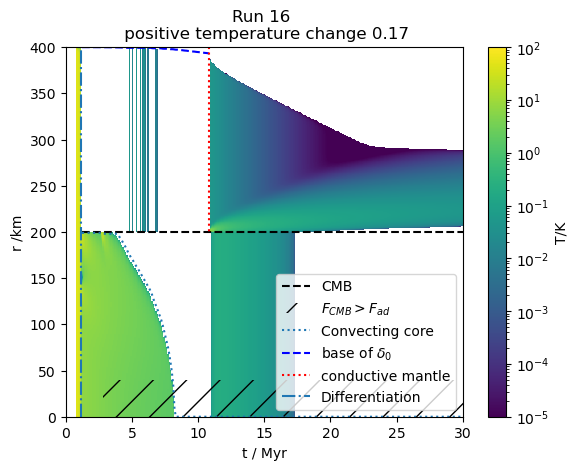

In [16]:
plt.figure()
plt.pcolormesh(t_plot_all[:-1],rplot,np.diff(Tall,1),shading = 'nearest',norm=mcolors.LogNorm(vmin=1e-5,vmax=1e2)) # use same vmin and vmax as other plots to make them comparable
plt.hlines(rc/1e3,min(t/Myr),max(tall/Myr),linestyle='--',color='black',label='CMB')
plt.fill_betweenx([0,rc/5e3],t[np.where(Fcmb>Fad)[0]][0]/Myr,t[np.where(Fcmb>Fad)[0]][-1]/Myr,alpha=0,hatch='/',label='$F_{CMB}>F_{ad}$')
plt.plot(t/Myr,r_unstable,linestyle='dotted',label='Convecting core')
if conduction == True:
    plt.plot(t[t/Myr<=cond_t]/Myr,(r-d0[t/Myr<=cond_t])/1e3,linestyle='dashed',label='base of $\delta_0$',color='blue')
    plt.vlines(t[t/Myr<=cond_t][-1]/Myr,r/1e3,rc/1e3,linestyle='dotted',label='conductive mantle',color='red')
else:
    plt.plot(t/Myr,(r-d0)/1e3,linestyle='dashed',label='base of $\delta_0$',color='blue')
plt.ylabel('r /km')
plt.xlabel('t / Myr')
#plt.ylim([(r-10000)/1e3,r/1e3])
plt.ylim([0,r/1e3])
plt.vlines(tdiff[-1]/Myr,0,r/1e3,linestyle='-.',label='Differentiation')
plt.colorbar(label='T/K')
plt.title(f'Run {run} \n positive temperature change {(diff_T-1400)/400:.2f}')
#plt.xscale('log')
plt.xlim([0,30])
plt.legend(loc='lower right')
if save == True:
    plt.savefig(f'Plots/dTall_run{run}.png')

$\frac{dT}{dt}<0$

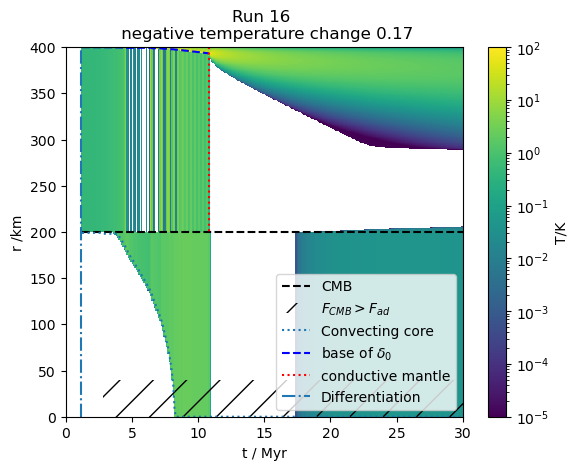

In [17]:
plt.figure()
plt.pcolormesh(t_plot_all[:-1],rplot,-np.diff(Tall,1),shading = 'nearest',norm=mcolors.LogNorm(vmin=1e-5,vmax=1e2)) # use same vmin and vmax as other plots to make them comparable
plt.hlines(rc/1e3,min(t/Myr),max(tall/Myr),linestyle='--',color='black',label='CMB')
plt.fill_betweenx([0,rc/5e3],t[np.where(Fcmb>Fad)[0]][0]/Myr,t[np.where(Fcmb>Fad)[0]][-1]/Myr,alpha=0,hatch='/',label='$F_{CMB}>F_{ad}$')
plt.plot(t/Myr,r_unstable,linestyle='dotted',label='Convecting core')
if conduction == True:
    plt.plot(t[t/Myr<=cond_t]/Myr,(r-d0[t/Myr<=cond_t])/1e3,linestyle='dashed',label='base of $\delta_0$',color='blue')
    plt.vlines(t[t/Myr<=cond_t][-1]/Myr,r/1e3,rc/1e3,linestyle='dotted',label='conductive mantle',color='red')
else:
    plt.plot(t/Myr,(r-d0)/1e3,linestyle='dashed',label='base of $\delta_0$',color='blue')
plt.ylabel('r /km')
plt.xlabel('t / Myr')
#plt.ylim([(r-10000)/1e3,r/1e3])
plt.ylim([0,r/1e3])
plt.vlines(tdiff[-1]/Myr,0,r/1e3,linestyle='-.',label='Differentiation')
plt.colorbar(label='T/K')
plt.title(f'Run {run} \n negative temperature change {(diff_T-1400)/400:.2f}')
#plt.xscale('log')
plt.xlim([0,30])
plt.legend(loc='lower right')
if save == True:
    plt.savefig(f'Plots/Tall_run{run}.png')

## Melted silicate content <a class="anchor" id="silicate"></a>
<p align="right">(<a href="#top">back to top</a>)</p>

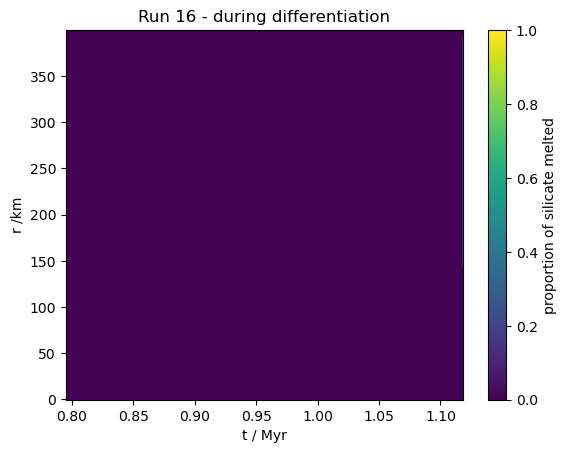

In [18]:
plt.figure()
plt.pcolormesh(tdiff/Myr, rplot,silicate_d,shading = 'nearest',vmin=0,vmax=1) # use same vmin and vmax as other plots to make them comparable
#plt.yscale('log')
plt.ylabel('r /km')
plt.xlabel('t / Myr')
#plt.ylim([0,400])
plt.title(f'Run {run} - during differentiation')
plt.colorbar(label='proportion of silicate melted')
if save ==True:
    plt.savefig(f'Plots/si_diff_run_{run}.png')

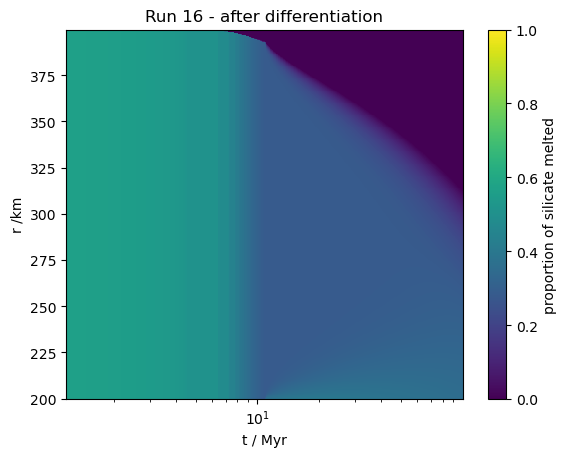

In [19]:
rmantle = np.arange(int(r/2),int(r),int(dr))/1e3
plt.figure()
plt.pcolormesh(t/Myr, rmantle,np.transpose(silicate_t),shading = 'nearest',vmin=0, vmax=1) # use same vmin and vmax as other plots to make them comparable
plt.xscale('log')
plt.ylabel('r /km')
plt.xlabel('t / Myr')
#plt.ylim([0,400])
plt.title(f'Run {run} - after differentiation')
plt.colorbar(label='proportion of silicate melted')
if save ==True:
    plt.savefig(f'Plots/si_therm_run_{run}.png')

## Rayleigh number<a class="anchor" id="critical-rayleigh"></a>
<p align="right">(<a href="#top">back to top</a>)</p>

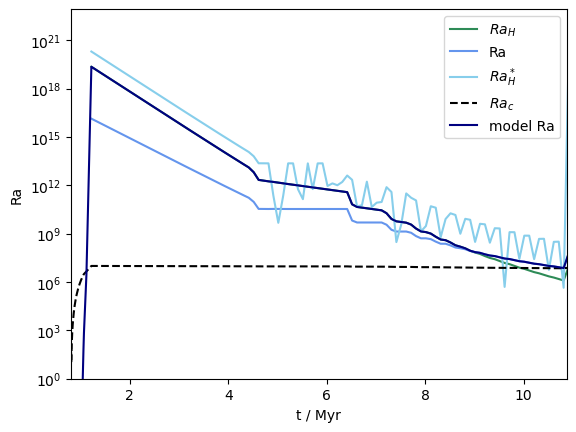

In [20]:
plt.figure()
plt.semilogy(t/Myr,RaH,label='$Ra_H$',color='seagreen')
plt.semilogy(t/Myr,RanoH,label='Ra',color='cornflowerblue')
plt.semilogy(t/Myr,RaRob, label='$Ra_H^*$',color='skyblue')
plt.semilogy(t_plot_all,Ra_crit_all,label='$Ra_c$',linestyle='dashed',color='black') 
plt.semilogy(t_plot_all,Ra_all,label='model Ra',color='navy') 
plt.ylim(bottom=1e0)#,top=1e8)
#plt.xlim([min(tall/Myr),5])
#plt.vlines(tdiff[-1]/Myr,1e3,1e18,linestyle='dotted',color='blue',label='differentiation')
if conduction == True:
    #plt.vlines(cond_t,1e3,1e18,linestyle='dashed',color='k',label='conduction')
    plt.xlim([min(tall/Myr),cond_t])
plt.ylabel('Ra')
#plt.xscale('log')
plt.xlabel('t / Myr')
#plt.title(f'Run {run}')
plt.legend()
#if save == True:
#plt.savefig(f'Plots/Ra_run{run}.png')

### Plot difference between Rayleigh-Roberts and approximation

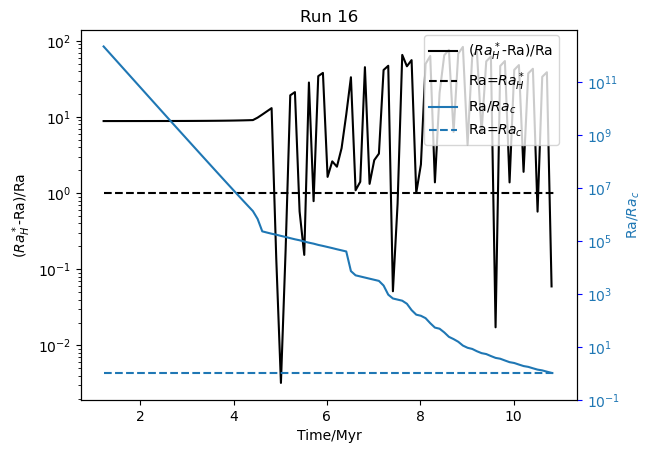

In [32]:
fig=plt.figure()
ax1 = fig.add_subplot(111)
ax2 = ax1.twinx()
ax1.semilogy(t[t/Myr<cond_t]/Myr,(abs(RaRob)/Ra)[t/Myr<cond_t],label='($Ra_H^*$-Ra)/Ra',color='black') 
ax2.semilogy(t[t/Myr<cond_t]/Myr,(Ra/Racrit)[t/Myr<cond_t],label='Ra/$Ra_c$')
ax1.hlines(1,min(t/Myr),cond_t,linestyle='dashed',label='Ra=$Ra_H^*$',color='black')
ax2.hlines(1,min(t/Myr),cond_t,linestyle='dashed',label='Ra=$Ra_c$')
ax2.set_ylim(bottom=1e-1)
ax1.set_ylabel('($Ra_H^*$-Ra)/Ra')
ax1.set_xlabel('Time/Myr')
ax2.set_ylabel('Ra/$Ra_c$',color=u'#1f77b4')
ax2.tick_params('y',color='blue',labelcolor=u'#1f77b4')
fig.legend(loc=(0.65,0.68))
ax1.set_title(f'Run {run}')

if save == True:
    plt.savefig(f'Plots/modified_Ra_run{run}.png',dpi=300)


Could be nice to twin the axes on this and add one for silicate melt fraction?

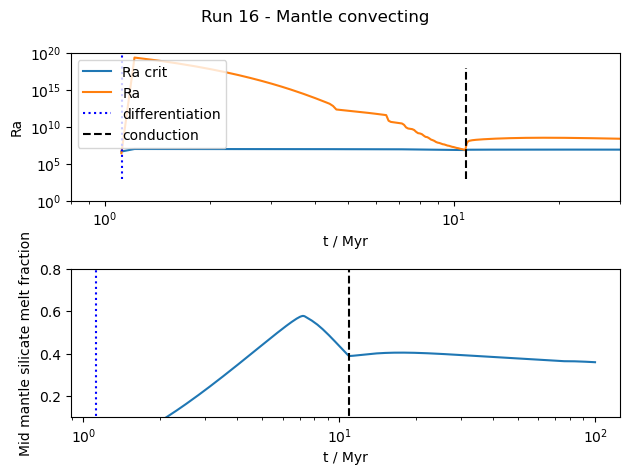

In [22]:
plt.figure(tight_layout=True)
plt.subplot(2,1,1)
plt.semilogy(t_plot_all[d0_all<r],Ra_crit_all[d0_all<r],label='Ra crit') 
plt.semilogy(t_plot_all[d0_all<r],Ra_all[d0_all<r],label='Ra') 
plt.ylim(bottom=1e0)
plt.xlim([min(tall/Myr),30])
plt.vlines(tdiff[-1]/Myr,1e3,1e25,linestyle='dotted',color='blue',label='differentiation')
if conduction == True:
    plt.vlines(cond_t,1e3,1e18,linestyle='dashed',color='k',label='conduction')
plt.ylabel('Ra')
plt.xscale('log')
plt.xlabel('t / Myr')
plt.legend()
plt.subplot(2,1,2)
plt.plot(t_plot_all[d0_all<r],(Tall[int(nmantle/2),d0_all<r]-1400)/400)
plt.vlines(tdiff[-1]/Myr,0,0.8,linestyle='dotted',color='blue',label='differentiation')
if conduction == True:
    plt.vlines(cond_t,0,0.8,linestyle='dashed',color='k',label='conduction')
#plt.xlim([min(tall/Myr),30])
plt.ylim([0.1,0.8])
plt.xscale('log')
plt.ylabel('Mid mantle silicate melt fraction')
plt.suptitle(f'Run {run} - Mantle convecting')
plt.xlabel('t / Myr')
if save == True:
    plt.savefig(f'Plots/Ra_phi_comp_run{run}.png',dpi=300)

## Stagnant lid thickness <a class="anchor" id="d0"></a>
<p align="right">(<a href="#top">back to top</a>)</p>

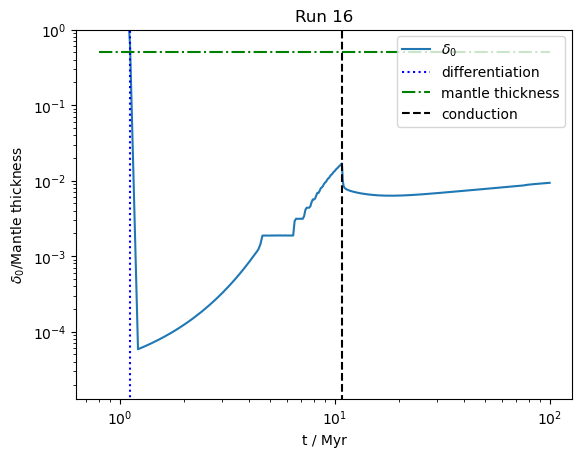

In [23]:
plt.figure()
plt.semilogy(tall/Myr,d0_all/r,label='$\delta_0$') 
plt.ylim(top=1e0)
#plt.xlim([min(tall/Myr),25])
plt.vlines(tdiff[-1]/Myr,0,1,linestyle='dotted',color='blue',label='differentiation')
plt.hlines(0.5,min(tall/Myr),max(tall/Myr),linestyle='-.',color='green',label='mantle thickness')
if conduction == True:
    plt.vlines(cond_t,0,1,linestyle='dashed',color='k',label='conduction')
plt.ylabel('$\delta_0$/Mantle thickness')
plt.xlabel('t / Myr')
plt.xscale('log')
plt.title(f'Run {run}')
plt.legend()
if save == True:
    plt.savefig(f'Plots/d0_run{run}.png')

### CMB boundary layer thickness

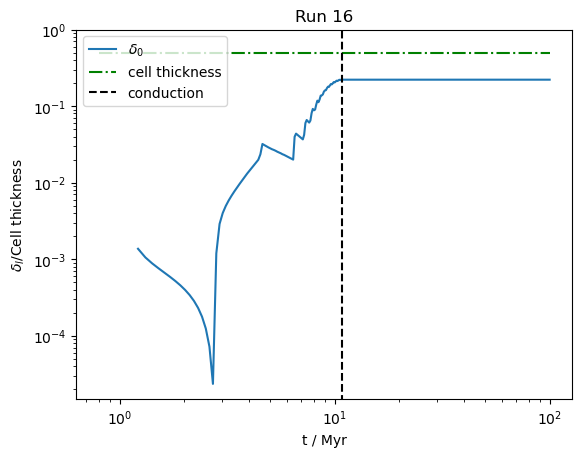

In [24]:
plt.figure()
plt.semilogy(t_plot_t,dl/dr,label='$\delta_0$') 
plt.ylim(top=1e0)
#plt.xlim([min(tall/Myr),25])
plt.hlines(0.5,min(tall/Myr),max(tall/Myr),linestyle='-.',color='green',label='cell thickness')
if conduction == True:
    plt.vlines(cond_t,0,1,linestyle='dashed',color='k',label='conduction')
plt.ylabel('$\delta_l$/Cell thickness')
plt.xlabel('t / Myr')
plt.xscale('log')
plt.title(f'Run {run}')
plt.legend()
if save == True:
    plt.savefig(f'Plots/dl_run{run}.png')

## Urey ratio  <a class="anchor" id="Urey"></a>
<p align="right">(<a href="#top">back to top</a>)</p>

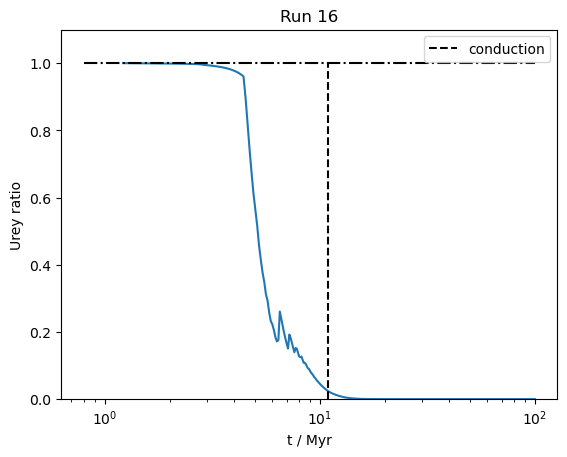

In [25]:
plt.figure()
plt.plot(t_plot_t,Urey) 
#plt.xlim([min(tall/Myr),25])
plt.hlines(1,min(tall/Myr),max(tall/Myr),linestyle='-.',color='black')
if conduction == True:
    plt.vlines(cond_t,0,1,linestyle='dashed',color='k',label='conduction')
    plt.legend()
plt.ylabel('Urey ratio')
plt.xlabel('t / Myr')
plt.xscale('log')
plt.ylim([0,1.1])
plt.title(f'Run {run}')
if save == True:
 plt.savefig(f'Plots/Urey{run}.png')

## Melted iron content during differentiation<a class="anchor" id="iron"></a>
<p align="right">(<a href="#top">back to top</a>)</p>

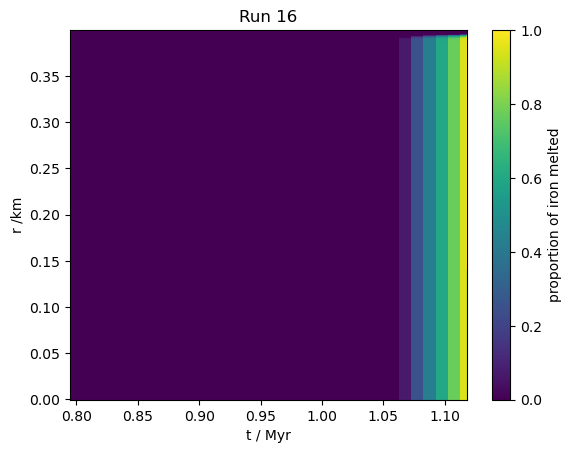

In [26]:
plt.figure()
plt.pcolormesh(tdiff/Myr, rplot/1e3,iron,shading = 'nearest') # use same vmin and vmax as other plots to make them comparable
#plt.yscale('log')
plt.ylabel('r /km')
plt.xlabel('t / Myr')
#plt.ylim([0,400])
plt.title(f'Run {run}')
plt.colorbar(label='proportion of iron melted')
if save ==True:
    plt.savefig(f'Plots/fe_diff_run_{run}.png')

## Temperature and Flux Plot <a class="anchor" id="temp-heat"></a>
<p align="right">(<a href="#top">back to top</a>)</p>

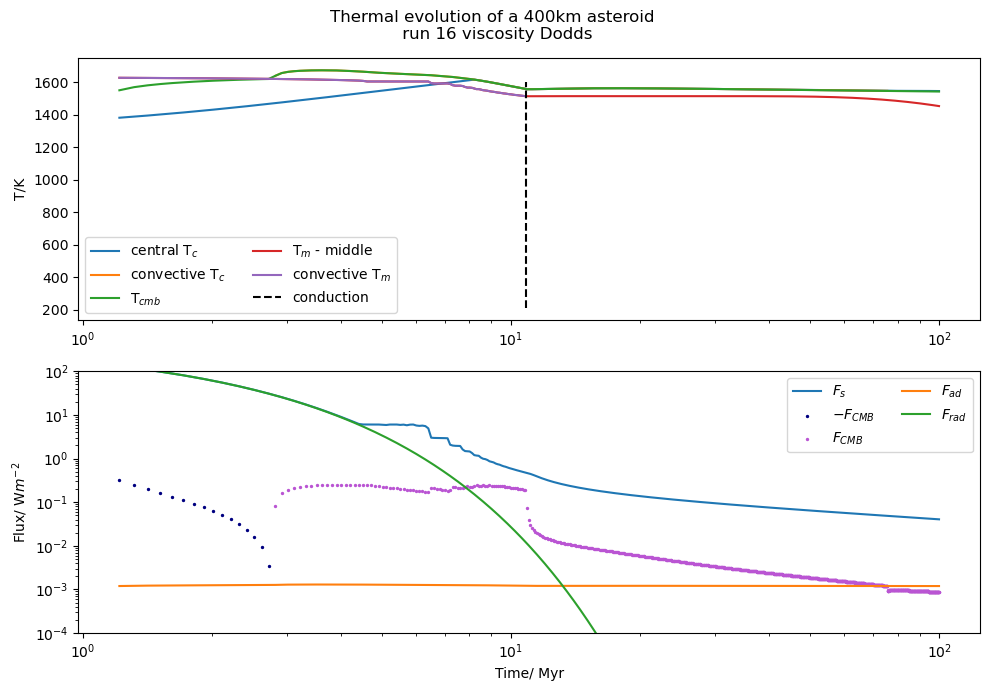

In [27]:
plt.figure(tight_layout=True,figsize=[10,7])
plt.suptitle(f'Thermal evolution of a {r/1e3:.0f}km asteroid \n run {run} viscosity {viscosity}')

xmin=tstart

#temperatures as function of time
plt.subplot(2,1,1)
if log_time == True:
    plt.semilogx(t_plot_t,Tc,label='central T$_c$')
    plt.semilogx(t_plot_t[Tc_conv!=0],Tc_conv[Tc_conv!=0],label='convective T$_c$')
    plt.semilogx(t_plot_t,Tcmb,label='T$_{cmb}$')
    plt.semilogx(t_plot_t,Tm_mid,label='T$_m$ - middle')
    plt.semilogx(t_plot_t[Tm_conv!=0],Tm_conv[Tm_conv!=0],label='convective T$_m$')
    #plt.semilogx(t_plot_t,Tm_conv,label='convective T$_m$')
    #plt.semilogx(t_plot_t,Tm_surf,label='T$_m$ - surface')
else:
    plt.plot(t_plot_t,Tc,label='central T$_c$')
    plt.plot(t_plot_t[Tc_conv!=0],Tc_conv[Tc_conv!=0],label='convective T$_c$')
    plt.plot(t_plot_t,Tcmb,label='T$_{cmb}$')
    plt.plot(t_plot_t,Tm_mid,label='T$_m$ - middle')
    plt.plot(t_plot_t[Tm_conv!=0],Tm_conv[Tm_conv!=0],label='convective T$_m$')
    #plt.plot(t_plot_t,Tm_surf,label='T$_m$ - surface')
if conduction == True:
    plt.vlines(cond_t,ymin=min(Tm_surf),ymax=1600,color='black',linestyle='--',label='conduction')
#plt.ylim([1460,1650]) #use these limits when comparing runs
plt.ylabel('T/K')
plt.legend(loc='lower left', ncol= 2)

#fluxes as function of time
plt.subplot(2,1,2)

Fcmb_neg = Fcmb[Fcmb<0]
Fcmb_pos = Fcmb[Fcmb>0]
if log_time == True:
    plt.loglog(t_plot_t,Fs,label='$F_s$')
    plt.scatter(t_plot_t[Fcmb<0],abs(Fcmb_neg),label='$-F_{CMB}$',color='navy',s=2)
    plt.scatter(t_plot_t[Fcmb>0],Fcmb_pos,label='$F_{CMB}$',color='mediumorchid',s=2)
    plt.loglog(t_plot_t,Fad,label='$F_{ad}$')
    plt.loglog(t_plot_t,Frad,label='$F_{rad}$')
else:
    plt.semilogy(t_plot_t,Fs,label='$F_s$')
    plt.scatter(t_plot_t[Fcmb<0],abs(Fcmb_neg),label='$-F_{CMB}$',color='navy',s=2)
    plt.scatter(t_plot_t[Fcmb>0],Fcmb_pos,label='$F_{CMB}$',color='mediumorchid',s=2)
    plt.semilogy(t_plot_t,Fad,label='$F_{ad}$')
    plt.semilogy(t_plot_t,Frad,label='$F_{rad}$')
plt.xlabel('Time/ Myr')

plt.ylim([1e-4,1e2])   #use these limits when comparing runs
plt.ylabel('Flux/ W$m^{-2}$')
plt.legend(loc='upper right',ncol=2)


if save == True:
    plt.savefig('Plots/run_{}_Tflux.png'.format(run),dpi=450)


## Magnetic Reynolds number and inner core size <a class="anchor" id="Rem"></a>
<p align="right">(<a href="#top">back to top</a>)</p>

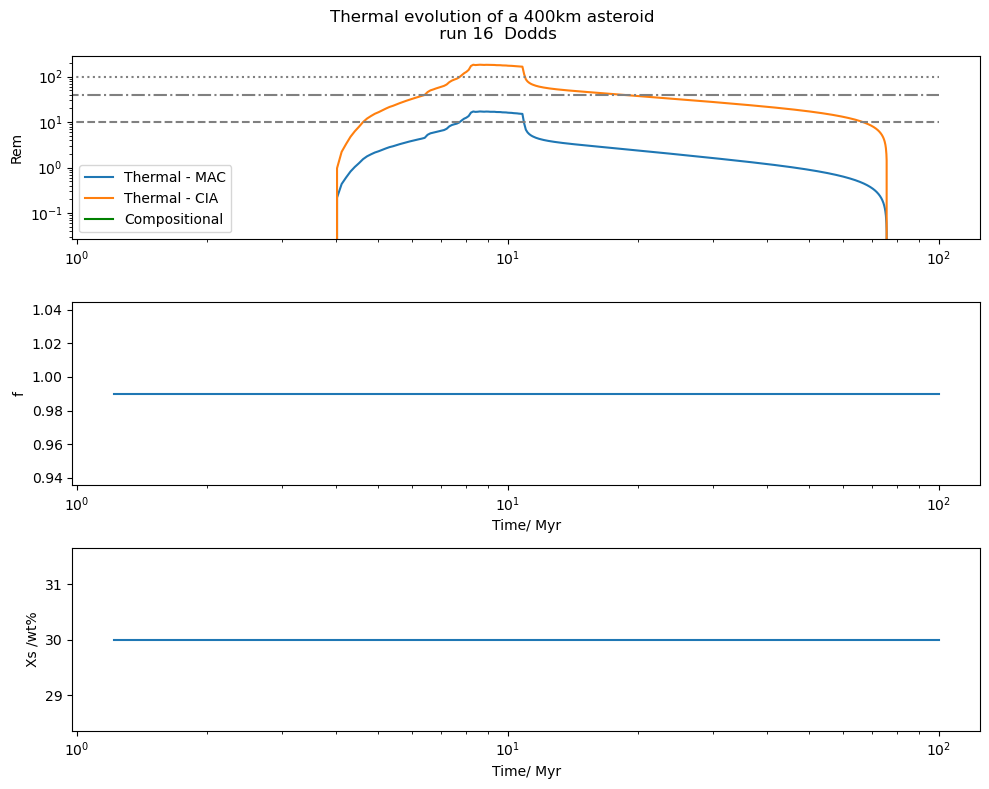

In [28]:
plt.figure(tight_layout=True,figsize=[10,8])
plt.suptitle(f'Thermal evolution of a {r/1e3:.0f}km asteroid \n run {run}  {viscosity}')
plt.subplot(3,1,1)
plt.loglog(t_plot_t,Rem_mac,label='Thermal - MAC')
plt.loglog(t_plot_t,Rem_cia,label='Thermal - CIA')
plt.loglog(t_plot_t[Rem_c!=0],Rem_c[Rem_c!=0],label='Compositional',color='green')
plt.hlines(10,xmin=0,xmax=t_plot_t[len(Rem_cia)-1],color='gray',linestyle='--')
plt.hlines(40,xmin=0,xmax=t_plot_t[len(Rem_cia)-1],color='gray',linestyle='-.')
plt.hlines(100,xmin=0,xmax=t_plot_t[len(Rem_cia)-1],color='gray',linestyle='dotted')
#plt.xlabel('Time/Myr')
plt.ylabel('Rem')
plt.legend(loc='lower left')
#plt.xscale('log')
#plt.xlim([100,200])

plt.subplot(3,1,2)
plt.plot(t_plot_t,f,label='f')
plt.xscale('log')
plt.xlabel('Time/ Myr')
plt.ylabel('f')

plt.subplot(3,1,3)
plt.plot(t_plot_t,Xs,label='Xs')
plt.xscale('log')
plt.xlabel('Time/ Myr')
plt.ylabel('Xs /wt%')


if save == True:
    plt.savefig('Plots/run_{}_Remf.png'.format(run),dpi=450)

In [29]:
t[f>0.001][-1]/Myr

99.9372491249044

### Time of dynamo generation

This needs tweaking to check for periods of on and off dynamo.

In [30]:
t_therm1 = t_plot_t[Rem_mac>10]
t_therm11 = t_therm1[t_therm1<100] #distinguish between early and late dynamo
t_therm12 = t_therm1[t_therm1>100]
t_therm2 = t_plot_t[Rem_cia>10]
t_therm21 = t_therm2[t_therm2<100]
t_therm22 = t_therm2[t_therm2>100]
t_comp = t_plot_t[Rem_c>10]
if np.any(Rem_mac>10):
    if np.any(t_therm1<100):
        print(f'MAC balance predicts there is a thermal dynamo between {t_therm11[0]:.1f} and {t_therm11[-1]:.1f}Myr')
    if np.any(t_therm1>100):
        print(f'MAC balance predicts there is a thermal dynamo between {t_therm12[0]:.1f} and {t_therm12[-1]:.1f}Myr')
else:
    print('MAC balance predicts there is no thermal dynamo')
if np.any(Rem_cia>10):
    if np.any(t_therm2<100):
        print(f'CIA balance predicts there is a thermal dynamo between {t_therm21[0]:.1f} and {t_therm21[-1]:.1f}Myr')
    if np.any(t_therm2>100):
        print(f'CIA balance predicts there is a thermal dynamo between {t_therm22[0]:.1f} and {t_therm22[-1]:.1f}Myr')
else:
    print('CIA balance predicts there is no thermal dynamo')
if np.any(Rem_c>10):
    print(f'There is a compositional dynamo between {t_comp[0]:.1f} and {t_comp[-1]:.1f} Myr')
else:
    print('There is no compositional dynamo')

MAC balance predicts there is a thermal dynamo between 7.8 and 10.8Myr
CIA balance predicts there is a thermal dynamo between 4.6 and 66.7Myr
There is no compositional dynamo


In [31]:
print(f'The maximum MAC Rem is {max(Rem_mac):.2f} at {t_plot_t[Rem_mac==max(Rem_mac)][0]:.2f} Myr')

The maximum MAC Rem is 17.14 at 8.61 Myr
